In [105]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [106]:
from sklearn import datasets

X, y = datasets.make_regression(n_samples=50, n_features=1, noise=25, random_state=42)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

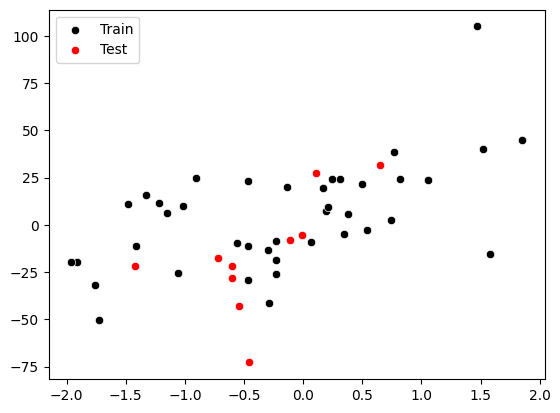

In [108]:
sns.scatterplot(x=X_train[:,0], y=y_train, c='black', label='Train')
sns.scatterplot(x=X_test[:,0], y=y_test, c='red', label='Test')

In [109]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=adam, metrics=['mse'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, epochs=3500)

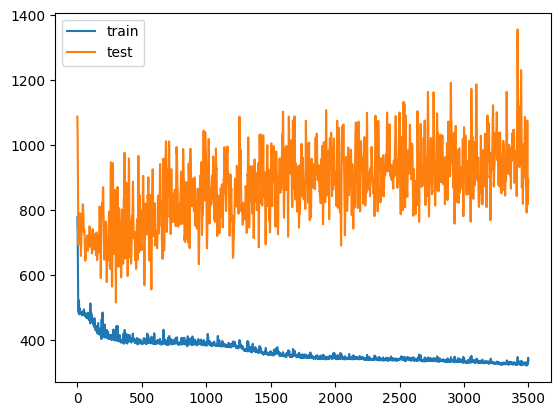

In [110]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Now DropOut method will be used and changes will be observed

In [118]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=adam, metrics=['mse'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, epochs=3500)

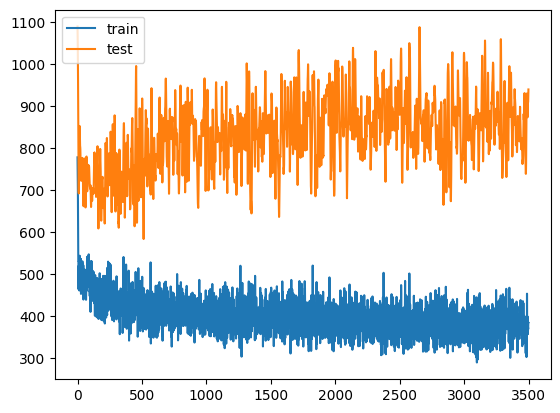

In [119]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()